In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.signal import medfilt

import sklearn.cluster
from sklearn.model_selection import train_test_split
import trimap

    
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

path = "/media/DOCUMENTOS/Backups/Data"

In [19]:
date="expo_SV0_march_14_2/"
label="_1"
path_coadds= path+ "/desi_data/"+date

(1797, 2)

In [20]:
df = pd.read_pickle(path_coadds+str(path_coadds.split("/")[-2])+".csv")
df.head()

TARGETID                                         WAVELENGTH  \
0  35186148770843363  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
1  35186148770843761  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
2  35186148770844616  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
3  35186148775036873  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
4  35186148775037106  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   

                                                FLUX  \
0  [16.629738, -7.133062, 4.2576985, 25.119408, 9...   
1  [0.032739643, 10.340323, 0.28587627, 16.81467,...   
2  [9.3599, -0.30654413, 20.865473, 3.4739144, 21...   
3  [0.5740119, 2.6363888, -8.660715, -6.4718666, ...   
4  [-0.729177, 6.761434, 12.152129, 18.775274, 31...   

                                             ERRFLUX          CHI2         Z  \
0  [0.017274935, 0.010060674, 0.010030603, 0.0073...  12707.085760 -0.000116   
1  [0.02114713, 0.010559111, 0.010497417, 0.00900...  10390.526888  0.000073   
2  [0.018445576, 0.009608054, 0.009228553, 0.0082...   9012.405702  0.000272   
3  [0.019074239, 0.008593588, 0.011730482, 0.0095...   9322.706255 -0.000187   
4  [0.01886503, 0.0092472015, 0.010697438, 0.0077...  10271.535701 -0.000076   

       ZERR  ZWARN  NPIXELS SPECTYPE SUBTYPE  NCOEFF     DELTACHI2  NUMEXP  \
0  0.000004      0     7928     STAR       M       5  10090.780903       0   
1  0.000007      0     7929     STAR       M       5   5975.451571       0   
2  0.000026      0     7930     STAR       K       5    167.001616       0   
3  0.000017      0     7924     STAR       K       5     42.947868       0   
4  0.000008      0     7926     STAR       K       5   1487.379914       0   

   NUMTILE   TILE      NIGHT PETAL  
0        1  65008  20200314.     0  
1        1  65008  20200314.     0  
2        1  65008  20200314.     0  
3        1  65008  20200314.     0  
4        1  65008  20200314.     0

In [21]:
columns_D = ['FLUX','TARGETID']
X = df[columns_D]
Y = np.array(df['SPECTYPE'])

In [22]:
classes = np.unique(Y)
print(classes)
for i, c in enumerate(classes):
    Y[Y == c] = i  # GALAXY=0  -   QSO=1    -  STAR=2
print(Y)

['GALAXY' 'QSO' 'STAR']
[2 2 2 ... 0 0 0]


In [23]:
'''
X1, X2, Y1, Y2 = train_test_split(X, Y, test_size=0.5, random_state=42)
TID1 = np.array(X1['TARGETID']).tolist()
TID2 = np.array(X2['TARGETID']).tolist()
X1 = np.array(X1['FLUX']).tolist()
X2 = np.array(X2['FLUX']).tolist()
Y1 = np.array(Y1.tolist())
Y2 = np.array(Y2.tolist())
'''

TID1 = np.array(X['TARGETID']).tolist()
X1 = np.array(X['FLUX']).tolist()
Y1 = np.array(Y.tolist())


colors = np.zeros(len(Y1)).astype(str)
colors[Y1==0] = "#75bbfd"
colors[Y1==1] = "#c20078"
colors[Y1==2] = "#96f97b"

TRIMAP(n_inliers=20, n_outliers=10, n_random=10, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=1000.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 22105 points with dimension 2751
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 6871.833, Violated triplets: 0.1480
Iteration:  200, Loss: 6589.840, Violated triplets: 0.1420
Iteration:  300, Loss: 6333.755, Violated triplets: 0.1364
Iteration:  400, Loss: 6129.845, Violated triplets: 0.1321
Elapsed time: 0:01:06.091232


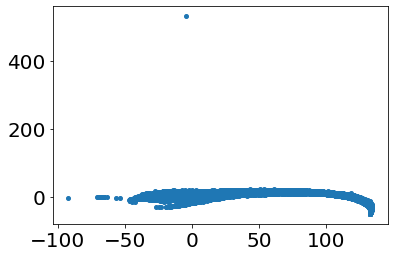

In [27]:
_ = plt.plot(embedding[:,0],embedding[:,1],"o")

TRIMAP(n_inliers=20, n_outliers=10, n_random=10, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=0.001, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 22105 points with dimension 2751
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 342.972, Violated triplets: 0.0074
Iteration:  200, Loss: 261.882, Violated triplets: 0.0056
Iteration:  300, Loss: 210.867, Violated triplets: 0.0045
Iteration:  400, Loss: 179.726, Violated triplets: 0.0039
Elapsed time: 0:01:01.711127


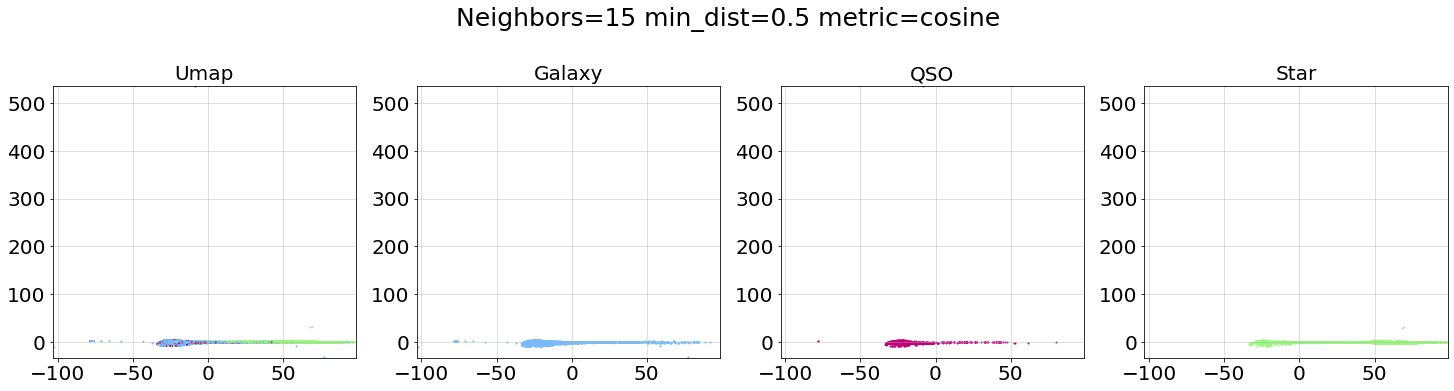

In [31]:
n = 1
fig = plt.figure(figsize=(25,5*n))
for i in range(n):
    embedding1 = trimap.TRIMAP(n_inliers=20,
                          n_outliers=10,
                          n_random=10,
                          weight_adj=0.001).fit_transform(np.array(X1))
    xmin = min(embedding1[:,0])-1
    xmax = max(embedding1[:,0])+1
    ymin = min(embedding1[:,1])-1
    ymax = max(embedding1[:,1])+1            

    plt.subplot(n,4,4*i+1)
    plt.title("Umap",size=20)
    plt.scatter(embedding1[:,0], embedding1[:,1], c=colors, cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    plt.subplot(n,4,4*i+2)
    plt.title("Galaxy",size=20)
    plt.scatter(embedding1[:,0][Y1==0], embedding1[:,1][Y1==0], color="#75bbfd", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

    plt.subplot(n,4,4*i+3)
    plt.title("QSO",size=20)
    plt.scatter(embedding1[:,0][Y1==1], embedding1[:,1][Y1==1], color="#c20078", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

    plt.subplot(n,4,4*i+4)
    plt.title("Star",size=20)
    plt.scatter(embedding1[:,0][Y1==2], embedding1[:,1][Y1==2], color="#96f97b", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.1)
#plt.savefig("../Figures/experiment1"+str(label)+".png",renderized=True, transparent=True)
#plt.savefig("../Figures/experiment1"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()